In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
# create a trivial image
w = 100
h = 80
I = np.zeros((h, w))
I[40:70, 30:50] = 1

<IPython.core.display.Javascript object>


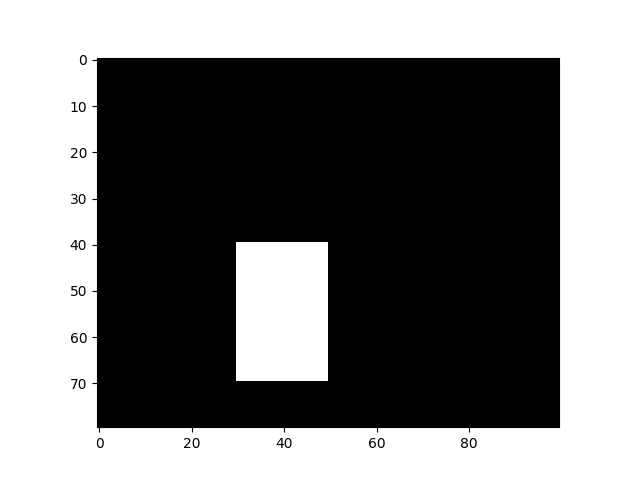

In [8]:
plt.figure()
plt.imshow(I, cmap='gray')

In [9]:
tx, ty = 20, 15

In [10]:
theta = np.pi / 8

In [11]:
I.shape

(80, 100)

In [31]:
A = np.array([
    [np.cos(theta), -np.sin(theta), tx],
    [np.sin(theta), np.cos(theta), ty],
    [0, 0, 1]
])

In [15]:
J = np.zeros_like(I)

In [32]:
coords = np.array([(y, x, 1) for x in range(w) for y in range(h)])

In [40]:
coords_t = (np.dot(A, coords.T)+.5).T.astype('int')

In [41]:
for index in range(coords.shape[0]):
    y, x = coords[index, :2]
    y_t, x_t = coords_t[index, :2]
    if y_t < 0 or y_t >= h: 
        continue
    if x_t < 0 or x_t >= w: 
        continue
    J[y_t, x_t] = I[y, x]

In [43]:
inside = np.logical_and.reduce([
    coords_t[:, :2] >= 0,
    coords_t[:, 0] < h,
    coords_t[:, 1] < w,
])

Y_t, X_t = coords_t[:, :2].T
Y, X = coords[:, :2].T
J[Y_t[inside], X_t[inside]] = I[Y[inside, X[inside]] 

<IPython.core.display.Javascript object>


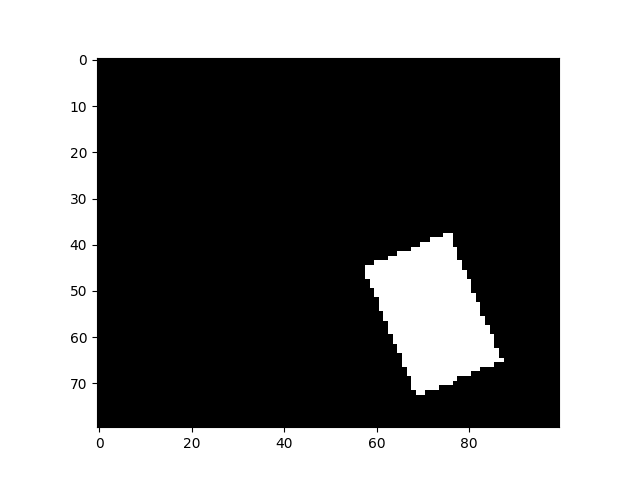

In [42]:
plt.figure()
plt.imshow(J, cmap='gray', interpolation='linear')